# Analysis of Cepheid Variables

 Matric: 2663452m

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize
import scipy.stats
import scipy.special
import scipy.integrate
import scipy.interpolate
from scipy import constants as consts
import cepheid_variables_functions as cv
import os

title_size = 16
axis_size = 13
markersize = 4
linewidth = 1.5


## Aim

The aim of this experiment was to analyse data of the apparent magnitude of Cepheid Variable stars to determine a Period-Luminosity relationship.

## Introduction

Cepheid Variable Stars are a class of pulsating supergiants, which can be used to measure distances, as they are intrinsically bright. They are useful for this as there exists a relationship between their period (the time it takes for the star to complete one cycle of pulsation) and their luminosity. Which allows the absolute magnitude of a distant Cepheid to be determined.
The relationship to be determined in this experiemnt is:
(equation 1) 
$$ log_{10}\left(\frac{\bar{L}}{L_{solar}}\right) = alog_{10}P+b $$

Where $\bar{L}$ is the average luminosity of the Cepheid, $L_{solar}$ is the luminosity of the Sun, $P$ is the period of the Cepheid,, and $a$ and $b$ are constants.
Or Alternatively in terms of the absolute magnitude:
(equation 2)
$$ \bar{M_V} = Alog_{10}P+B $$
Where $A$ and $B$ are constants, and $\bar{M_V}$ is the absolute magnitude of the Cepheid.

Useful Equations Given in the Lab Script:

(equation 3)
$$m_{V}^{model} = m_{V0} + m_V\sin\left(\frac{2{\pi}t}{P} + \phi\right)$$
Where $m_{V0}$ is the mean magnitude of the Cepheid, $m_V$ is the amplitude of the Cepheid, $t$ is the time, $P$ is the period of the Cepheid, and $\phi$ is the phase of the Cepheid.

(equation 4)
$$\chi^2 = \sum_{i=1}^{N}\frac{\left(m_{Vi}-m_{Vi}^{model}\right)^2}{\sigma^2}$$
Where $\sigma$ is the standard deviation of the data, and $N$ is the number of data points.

(equation 5)
$$m_V = M_V + 5log_{10}\left({d}\right)-5$$
Where $M_V$ is the Absolute magnitude of the Cepheid and $d$ is the distance to the Cepheid.

(equation 6)
$$m_V = M_V + 5log_{10}\left({d}\right)-5 +A_V$$
Where $A_V$ is the extinction coefficient.

### Task 1.1
In the first task we were required to load in the data for one of the stars, and plot the visual magnitude as a function of time, with a standard error of $\pm0.16$ on the apparent magnitude. This was done with use of numpy and matplotlib.

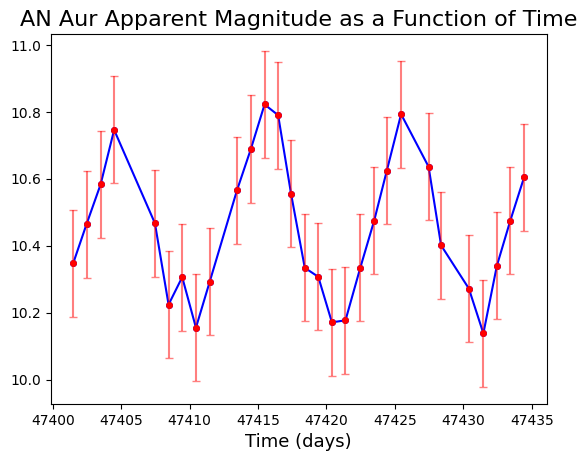

In [2]:
entries  = os.scandir('data_files/')
AN_Aur = np.loadtxt('data_files/AN_Aur_p.dat', unpack = True, usecols = [0,1])

plt.figure()
plt.plot(AN_Aur[0],AN_Aur[1],'o-', color = 'blue', markersize = markersize , linewidth = linewidth)
plt.title('AN Aur Apparent Magnitude as a Function of Time',  fontsize = title_size)
plt.xlabel('Time (days)', fontsize = axis_size)
markers, caps, bars = plt.errorbar(AN_Aur[0],AN_Aur[1], yerr = 0.16, fmt = 'o', color = 'red', markersize = markersize , linewidth = linewidth, capsize = 3)
[bar.set_alpha(0.5) for bar in bars]
[cap.set_alpha(0.5) for cap in caps]
plt.show()

AN_Aur_time = AN_Aur[0]
AN_Aur_mag = AN_Aur[1]

From the Graph above we can see that there is a sinusoidal variation in the apparent magnitude of thee cepheid as a function of time. Due to the pulsating nature of the star

### Task 1.2
Next we were required to detrmine the power of the star and plot this against time to determine a power spectrum for a single star. This was done with the use of the provided cepheids_variable_functions.py file which contains a function that taes three parameters (the time, magnitude and variation of periods to test for each star) and returns the power of the star. This was done for a range of periods from 3 to 28 days with 101 steps. This calculated power was then plotted against the period of the star. Along with the associated errors.

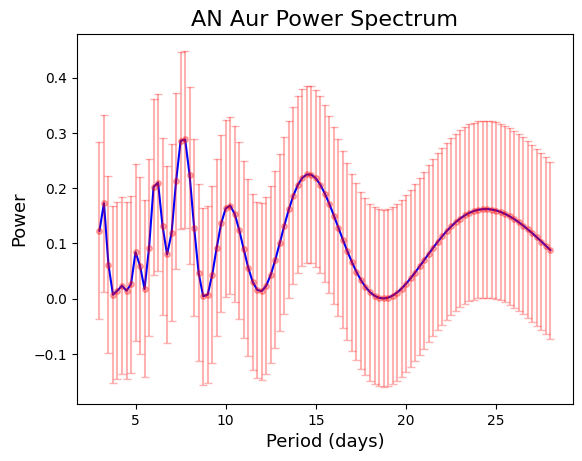

In [3]:
periods = np.linspace(3,28,101)
relative_time = AN_Aur_time - AN_Aur_time[0]
power = cv.powerSpectrum(relative_time, AN_Aur_mag, periods)

plt.figure()
plt.plot(periods, power, color = 'blue', linewidth = linewidth)
plt.title('AN Aur Power Spectrum',  fontsize = title_size)
plt.xlabel('Period (days)', fontsize = axis_size)
plt.errorbar(periods, power, yerr = 0.16, fmt = 'o', color = 'red', markersize = markersize , linewidth = linewidth, capsize = 3, alpha = 0.3)
plt.ylabel('Power', fontsize = axis_size)
plt.show()


Above we can see that the power spectrum for the first star has multiple peaks at different periods.  Each peak is a potential period candidate for the star. To determine the true period of pulsation for each star we will be required to do a least squares fit. However, before we can do that we need an array of these potential period candidates for each star.

### Task 1.3

In this task we load all the data for each of the 18 stars, and using the scipy.signal.find_peaks function to find the x axis value for each of the peaks on the graph, and save this data to the variable peaks_periods. This is done initially as aproof of concept but is done later in a loop for caculating 

In [4]:
from scipy.signal import find_peaks
peaks_indices, _ = find_peaks(power, distance=5)
peaks_periods = periods[peaks_indices]

In [5]:
import os
path = 'data_files/'
file_list = [f for f in sorted(os.listdir(path))
             if f.endswith('.dat')]

for file in file_list:
    filename = path + file
    time, v_mag = np.loadtxt(filename, unpack = True, usecols = [0,1])
    relative_time = time - time[0]
    power = cv.powerSpectrum(relative_time, v_mag, periods)
    peaks_indices, _ = find_peaks(power, distance=5)
    peaks_periods = periods[peaks_indices]
    print(f'Star {file}, With potential periods {peaks_periods} in days')

    
    

Star AN_Aur_p.dat, With potential periods [ 3.25  5.    6.25  7.75 10.25 14.5  24.5 ] in days
Star CH_Cas_p.dat, With potential periods [ 3.5   5.    7.25 10.   15.   26.25] in days
Star ER_Aur_p.dat, With potential periods [ 3.25  5.    6.25  7.75 10.25 14.5  24.5 ] in days
Star FM_Aql_p.dat, With potential periods [ 3.25  4.75  7.    9.5  13.   21.5 ] in days
Star GV_Aur_p.dat, With potential periods [ 4.25  5.5   7.75 13.25] in days
Star IN_Aur_p.dat, With potential periods [ 4.25  5.5   8.   13.5 ] in days
Star KK_Cas_p.dat, With potential periods [ 3.5   5.25  6.75  9.5  14.   23.5 ] in days
Star RS_Cas_p.dat, With potential periods [ 3.5   4.75  7.25 17.  ] in days
Star RX_Aur_p.dat, With potential periods [ 3.5   5.    6.25  7.75 11.5  22.25] in days
Star RY_Cas_p.dat, With potential periods [ 3.5   6.25  7.75 10.   15.25 23.75] in days
Star SW_Cas_p.dat, With potential periods [ 3.5   4.75  7.25 18.25] in days
Star SY_Aur_p.dat, With potential periods [ 3.25  4.75  6.    8.5  1

All Cepheid variable stars with their respective potential periods of pulsation.

### Task 2.1 & 2.2

In this task we are required to plot the apparent visual magnitude against each period candidate for each star, and then using the least squares (equation 4) test determine the period that provides the best fit for each set of data. From here we can append all of the necessary data to variables.


(equation 4)
$$\chi^2 = \sum_{i=1}^{N}\frac{\left(m_{Vi}-m_{Vi}^{model}\right)^2}{\sigma^2}$$
Where $\sigma$ is the standard deviation of the data, $N$ is the number of data points $m_{V0}$ is the mean magnitude of the Cepheid and $m_V$ is the amplitude of the Cepheid.


AN_Aur_p.dat, Lowest Chi Value = 0.10058670978599371, Corresponding period that gives the lowest Chi value = 10.378319227496405, Correspondiong apparent visual magnitude = 10.46751168395868


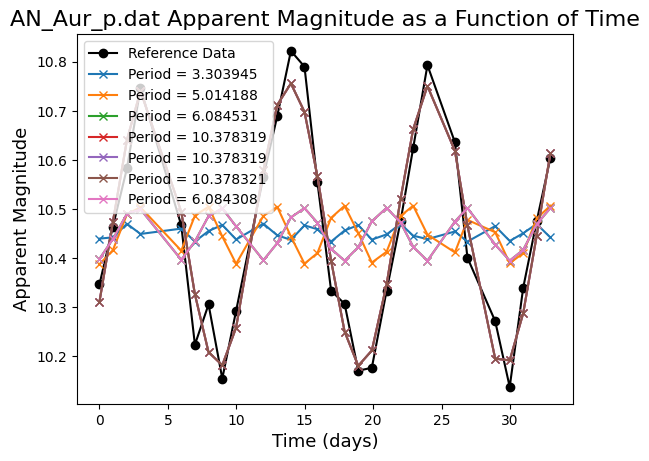

CH_Cas_p.dat, Lowest Chi Value = 0.515681238819334, Corresponding period that gives the lowest Chi value = 15.008678189058676, Correspondiong apparent visual magnitude = 11.043929065257455


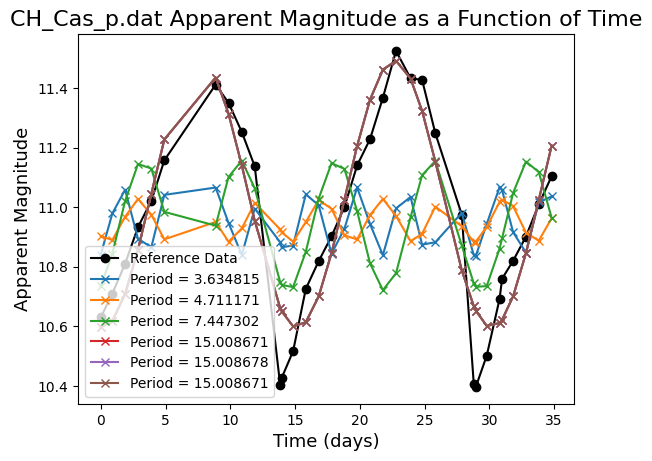

ER_Aur_p.dat, Lowest Chi Value = 0.4891839663053721, Corresponding period that gives the lowest Chi value = 15.646367175998286, Correspondiong apparent visual magnitude = 11.53764899108704


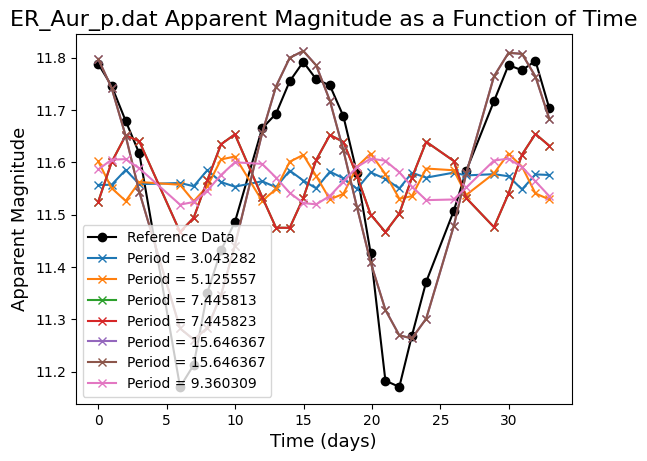

FM_Aql_p.dat, Lowest Chi Value = 1.463615680282349, Corresponding period that gives the lowest Chi value = 4.692081364166094, Correspondiong apparent visual magnitude = 8.305202439629474


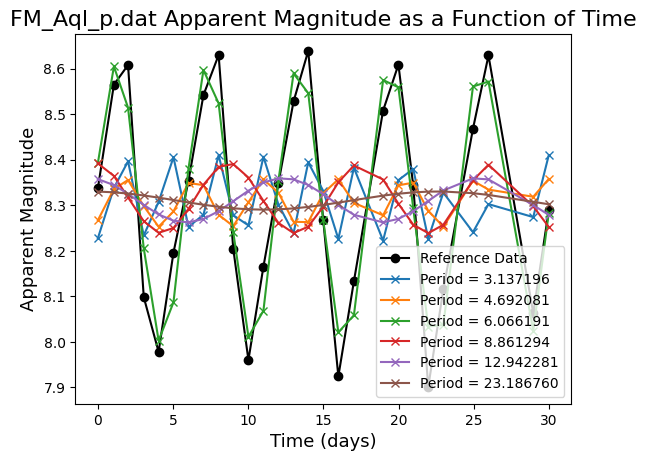

GV_Aur_p.dat, Lowest Chi Value = 0.851247064877815, Corresponding period that gives the lowest Chi value = 5.200409772397841, Correspondiong apparent visual magnitude = 12.092205069448267


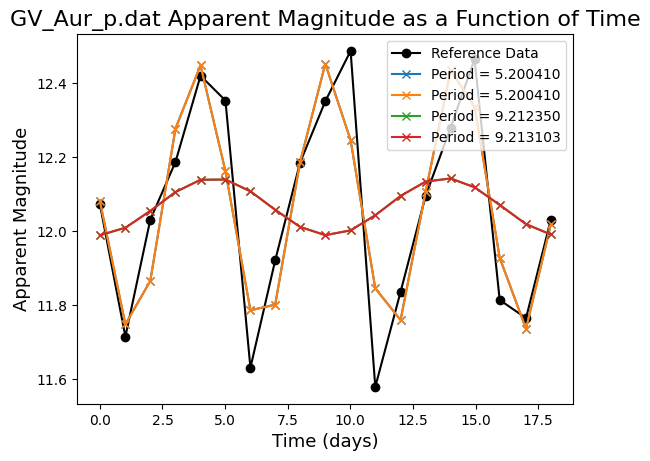

IN_Aur_p.dat, Lowest Chi Value = 0.6435330404478422, Corresponding period that gives the lowest Chi value = 11.527932510570079, Correspondiong apparent visual magnitude = 13.843119171194008


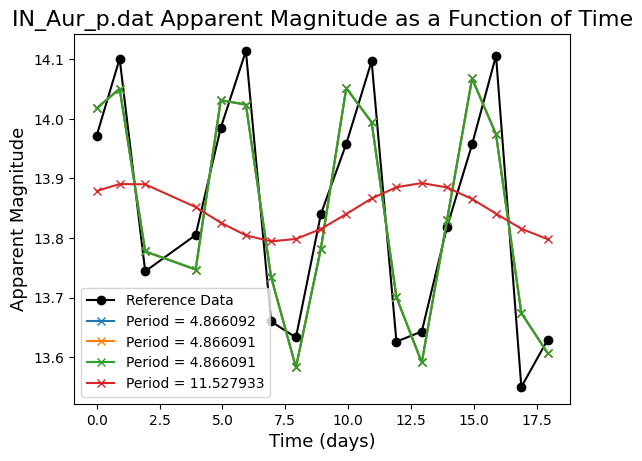

KK_Cas_p.dat, Lowest Chi Value = 1.1914656392433955, Corresponding period that gives the lowest Chi value = 5.2526814136209925, Correspondiong apparent visual magnitude = 11.933978411389752


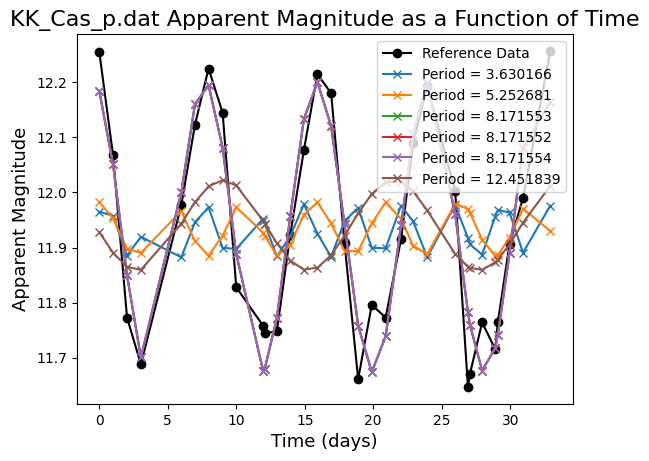

RS_Cas_p.dat, Lowest Chi Value = 1.237643255384162, Corresponding period that gives the lowest Chi value = 3.514266388507602, Correspondiong apparent visual magnitude = 9.91294378337381


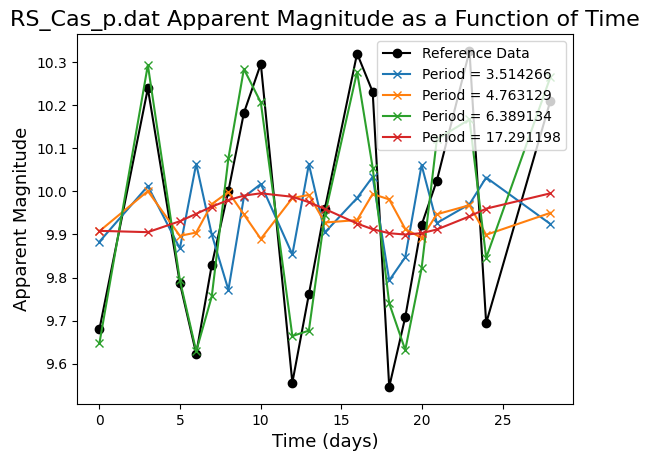

RX_Aur_p.dat, Lowest Chi Value = 0.06535035364616759, Corresponding period that gives the lowest Chi value = 11.633533916386591, Correspondiong apparent visual magnitude = 7.693879986664854


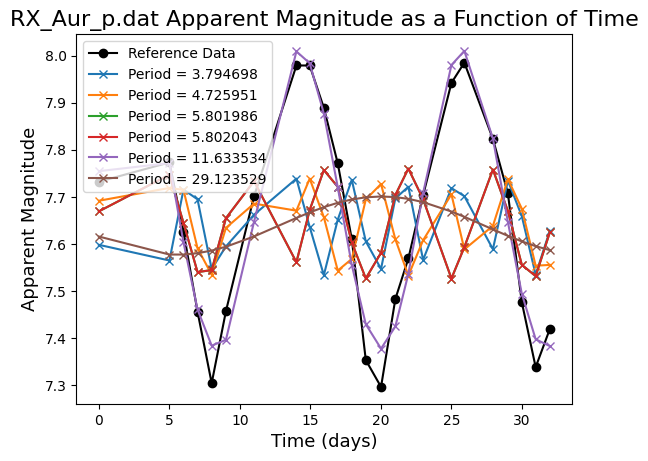

RY_Cas_p.dat, Lowest Chi Value = 3.161364345944193, Corresponding period that gives the lowest Chi value = 23.435802798755823, Correspondiong apparent visual magnitude = 9.977304124328073


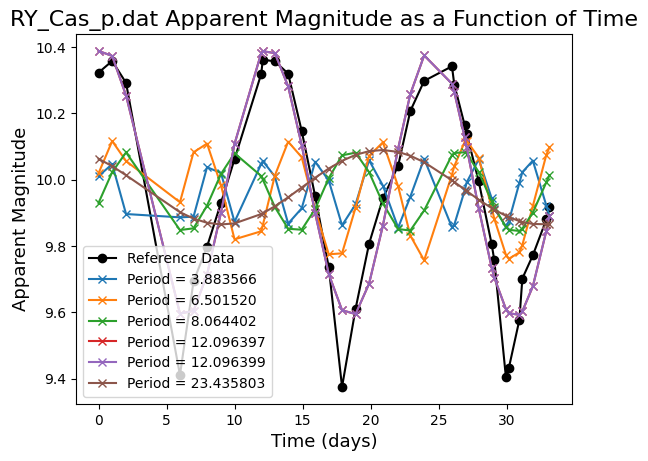

SW_Cas_p.dat, Lowest Chi Value = 0.652545369518879, Corresponding period that gives the lowest Chi value = 7.629250722196816, Correspondiong apparent visual magnitude = 9.80146884698971


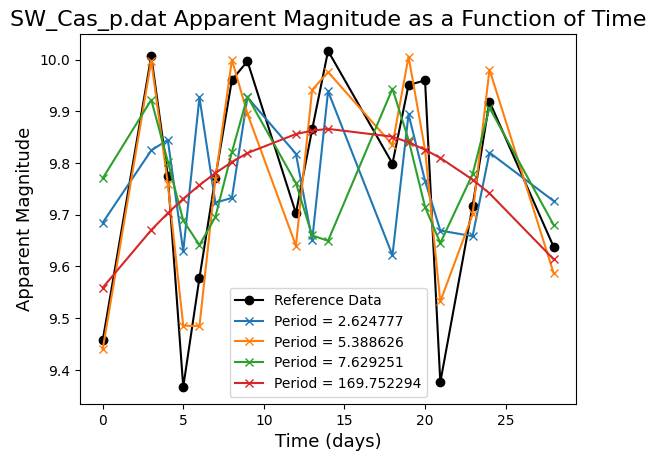

SY_Aur_p.dat, Lowest Chi Value = 0.9099157715636509, Corresponding period that gives the lowest Chi value = 5.818070202091072, Correspondiong apparent visual magnitude = 9.08545315722746


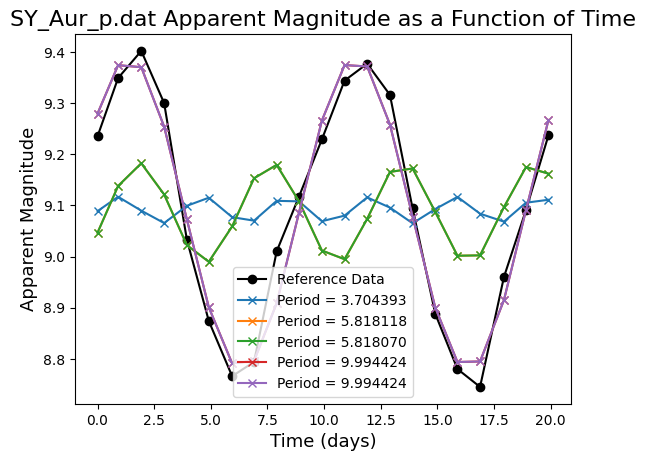

SY_Cas_p.dat, Lowest Chi Value = 2.6798872828109164, Corresponding period that gives the lowest Chi value = 8.30285369078003, Correspondiong apparent visual magnitude = 9.954689443687846


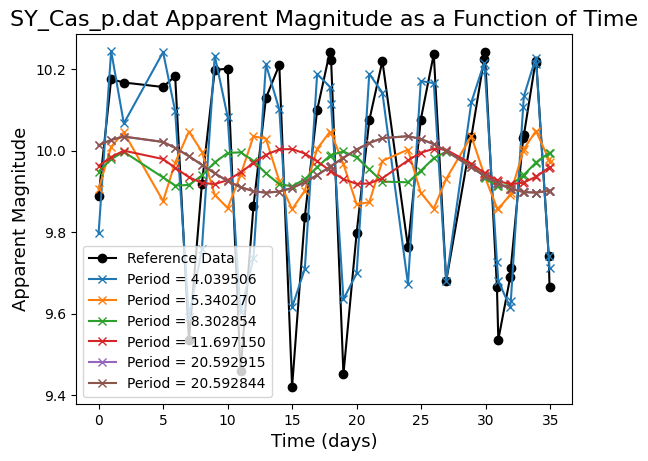

SZ_Aql_p.dat, Lowest Chi Value = 1.6962296818806828, Corresponding period that gives the lowest Chi value = 16.74328019687157, Correspondiong apparent visual magnitude = 8.606422505340504


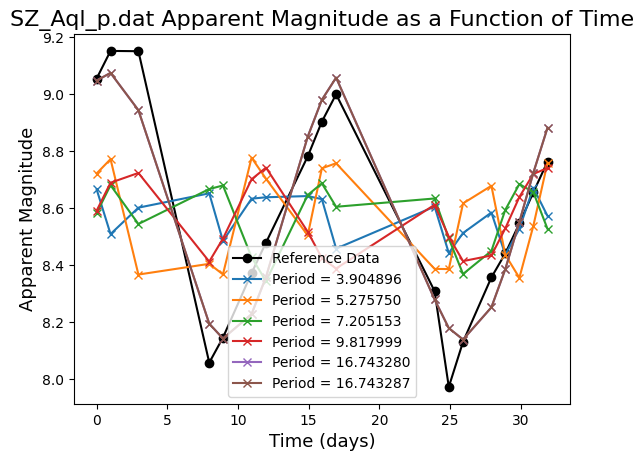

TT_Aql_p.dat, Lowest Chi Value = 2.9890268890637626, Corresponding period that gives the lowest Chi value = 13.671446761086301, Correspondiong apparent visual magnitude = 7.16851478451303


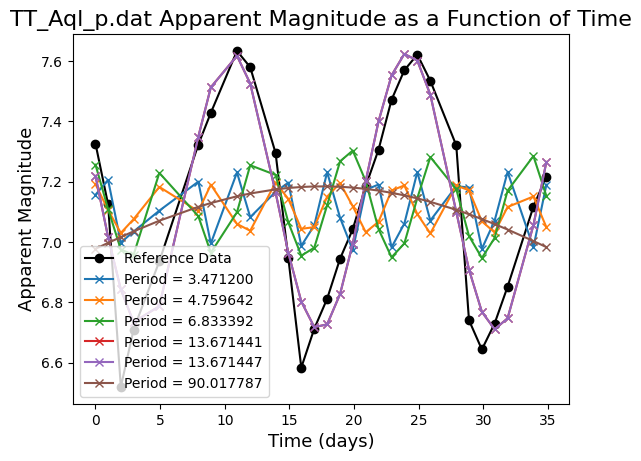

U_Aql_p.dat, Lowest Chi Value = 2.9810105433570033, Corresponding period that gives the lowest Chi value = 7.0204730834317814, Correspondiong apparent visual magnitude = 6.425292281031039


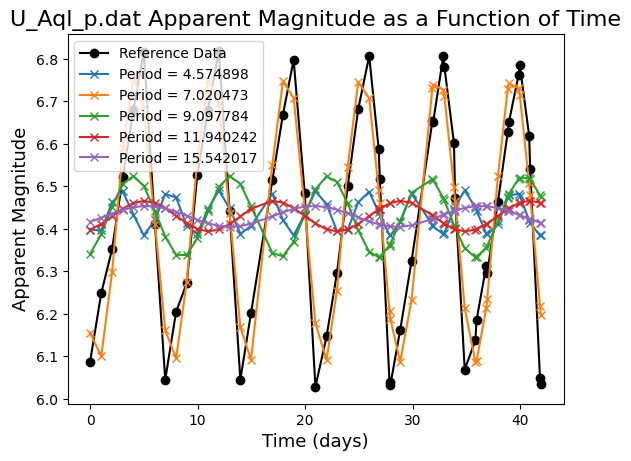

VW_Cas_p.dat, Lowest Chi Value = 1.4181402448507805, Corresponding period that gives the lowest Chi value = 22.74445192317833, Correspondiong apparent visual magnitude = 10.71181500510231


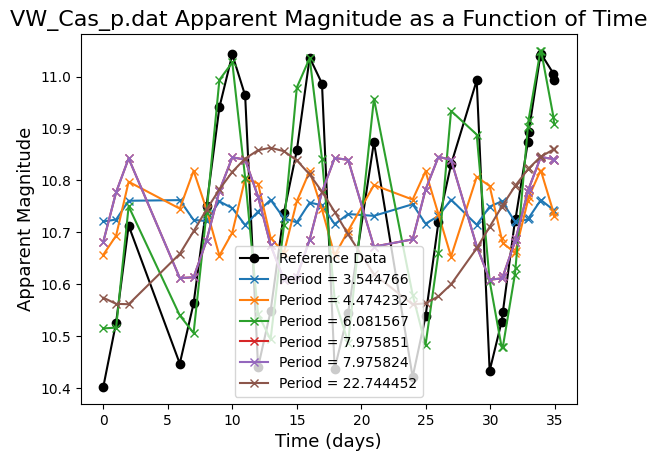

YZ_Aur_p.dat, Lowest Chi Value = 1.768298419309191, Corresponding period that gives the lowest Chi value = 8.152135539033319, Correspondiong apparent visual magnitude = 10.397622903198895


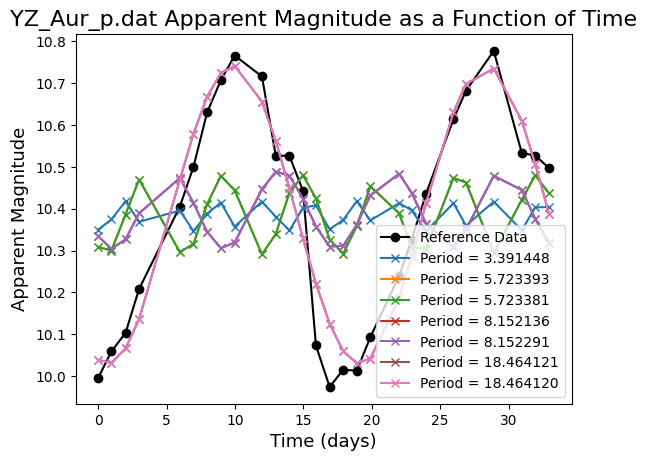

In [6]:
def func(t, m_v, phi,m_v0,P):
    return m_v0+m_v*(np.sin((2*np.pi*t/P) +phi))

chi_values = []
final_chi = []
final_period = []
final_apparent_visual_magnitude = []
err = []

for file in file_list:
    filename = path + file
    chilist = []
    fitted_period = []
    apparent_visual_magnitude = []
    time, v_mag = np.loadtxt(filename, unpack = True, usecols = [0,1])
    relative_time = time - time[0]
    power = cv.powerSpectrum(relative_time, v_mag, periods)
    peaks_indices, _ = find_peaks(power, distance=5)
    peaks_periods = periods[peaks_indices]
    plt.figure()
    
    plt.plot(relative_time, v_mag, 'o-', color = 'black',label = 'Reference Data')
    for i in peaks_periods:
        m_v = (np.max(v_mag)-np.min(v_mag)/2)
        m_v0 = (np.sum(v_mag)/v_mag.size)
        relative_time = (time - time[0])
        popt, pcov = scipy.optimize.curve_fit(func, relative_time, v_mag, p0 = [m_v0,m_v,1,i],sigma= 0.16*np.ones(time.size),absolute_sigma = True ,maxfev = 50000)
        plt.plot(relative_time, func(relative_time, popt[0], popt[1], popt[2], popt[3]), 'x-',  label = f'Period = {popt[3]:2f}' )
        plt.title(f'{file} Apparent Magnitude as a Function of Time',  fontsize = title_size, )
        plt.xlabel('Time (days)', fontsize = axis_size)
        plt.ylabel('Apparent Magnitude', fontsize = axis_size)
        
        plt.legend()
        chi = np.sum((v_mag-func(relative_time, popt[0], popt[1], popt[2], i))**2)
        chilist.append(chi)
        fitted_period.append(popt[3])
        apparent_visual_magnitude.append(popt[2])
        


    errors = np.sqrt(np.diag(pcov))
    err.append(errors[0])
    corre = (0,0,0,0,0,0,0,0,0,0,120.4,0,0,0,3.5,0,0,0)

    chilist_array = np.array((chilist))
    min_chilist_array = np.min(chilist_array)
    fitted_period_array = np.array(fitted_period)
    apparent_visual_magnitude_array = np.array(apparent_visual_magnitude)
    print(f'{file}, Lowest Chi Value = {np.min(chilist_array)}, Corresponding period that gives the lowest Chi value = {fitted_period_array[np.argmin(chilist_array)]}, Correspondiong apparent visual magnitude = {apparent_visual_magnitude_array[np.argmin(chilist_array)]}')
    final_chi.append(np.min(chilist_array))
    final_period.append(fitted_period_array[np.argmin(chilist_array)])
    final_apparent_visual_magnitude.append(apparent_visual_magnitude_array[np.argmin(chilist_array)])
    plt.show()
    star_data = {'file': file_list,"chi": final_chi, 'period': final_period, 'apparent_visual_magnitude': final_apparent_visual_magnitude}
    


From the plots above we can see that the printed periods that provide the lowest Chi value for each star match the expected period based on inspectionof the plots. This provides a good confidence level for the data taken from this experiment (period and apparent visual magnitude).

### Task 3.1

In this task we loaded in the data for the B-V colour band and distance from earth of each star and defined a function to calculate the Absolute Magnitude of each star, using equation 5.
Then plotted the Absolute Magnitude against the base 10 logorithm of the period of each star.


(equation 5)
$$m_V = M_V + 5log_{10}\left({d}\right)-5$$
Where $M_V$ is the Absolute magnitude of the Cepheid, m_V is the apparent magnitude and $d$ is the distance to the Cepheid.


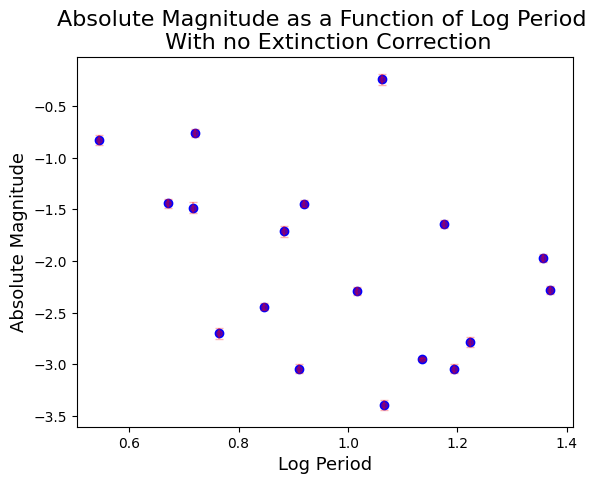

In [7]:
colour_band = np.loadtxt('data_files/colour_band.txt')
distance = np.loadtxt('data_files/distance.txt')
log_per = np.log10(star_data['period'])
final_err = np.array(err)-np.array(corre)
M_V = []


for i in range(len(final_apparent_visual_magnitude)):
    abs_mag_vis = final_apparent_visual_magnitude[i] - 5*np.log10(distance[i]) + 5
    M_V.append(abs_mag_vis)

def straight(x, m, c):
    return m*x + c

popt, pcov = scipy.optimize.curve_fit(straight, log_per, M_V, p0 = [-2,-1])
plt.figure()
plt.scatter(log_per, M_V, color = 'blue')
plt.title('Absolute Magnitude as a Function of Log Period \n With no Extinction Correction',  fontsize = title_size)
plt.xlabel('Log Period', fontsize = axis_size)
plt.ylabel('Absolute Magnitude', fontsize = axis_size)
plt.errorbar(log_per, M_V, yerr = final_err, fmt = 'o', color = 'red', markersize = markersize , linewidth = linewidth, capsize = 3, alpha = 0.3)
plt.show()

        

As in the graph above we have yet to calculate the extinction coefficient, the data is more spread and there is no obvious relationship between the period and absolute magnitude of the star, except the general negative gradient of the data. 

### Task 3.2

In this task we calculate the extinction coefficient for each star and thus can calculate the corrected Absolute Magnitude of each star using (equation 6)
Plotting the corrected Absolute Magnitude against the base 10 logorithm of the period of each star.


(equation 6)
$$m_V = M_V + 5log_{10}\left({d}\right)-5 +A_V$$
Where $A_V$ is the extinction coefficient.

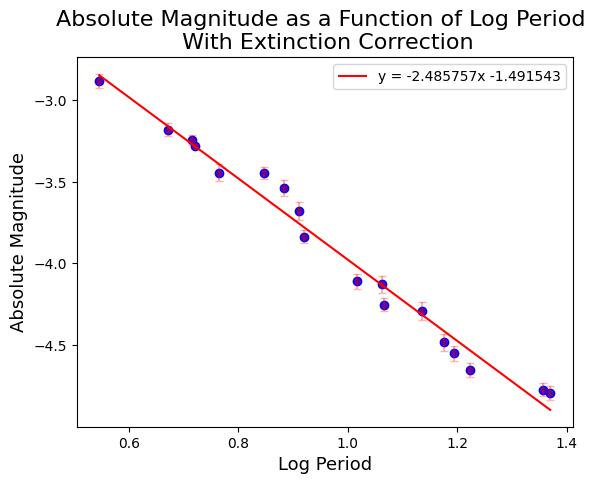

The gradient of the line is -2.485757 and the y-intercept is -1.491543 


In [8]:
M_V2 = []
Av = 3.1*colour_band
log_per = np.log10(star_data['period'])

for i in range(len(final_apparent_visual_magnitude)):
    abs_mag_vis = final_apparent_visual_magnitude[i] - (5*np.log10(distance[i])) + 5 - Av[i]
    M_V2.append(abs_mag_vis)
    
def straight(x, m, c):
    return m*x + c

M_V2_sort = np.sort(M_V2)
log_per_sort = np.sort(log_per)[::-1]
error = []
popt, pcov = scipy.optimize.curve_fit(straight, log_per_sort, M_V2_sort,sigma = final_err,absolute_sigma = True, p0 = [-2.5,-1])
curve = straight(log_per_sort, popt[0], popt[1])
plt.figure()
plt.scatter(log_per_sort, M_V2_sort, color = 'blue')
plt.title('Absolute Magnitude as a Function of Log Period \n With Extinction Correction',  fontsize = title_size)
plt.xlabel('Log Period', fontsize = axis_size)
plt.ylabel('Absolute Magnitude', fontsize = axis_size)
plt.plot(log_per_sort, curve, '-', color = 'red', label = f'y = {popt[0]:2f}x {popt[1]:2f}')
plt.errorbar(log_per_sort, M_V2_sort, yerr = final_err, fmt = 'o', color = 'red', markersize = markersize , linewidth = linewidth, capsize = 3, alpha = 0.3)
plt.legend()
plt.show()
print(f'The gradient of the line is {popt[0]:2f} and the y-intercept is {popt[1]:2f} ')



This graph shows a much more obvious relationship between the base 10 logarithm period and absolute magnitude of each star and thus this can be used as a representation of the period luminosity relationship as defined as (equation 1).

To conclude, from this experiment we have been able to determine the period of pulsation of 18 Cepheid variable stars, and by plotting these periods against the Absolute Magnitude of each star when corrected for extinction due to the galactic plane, we have been able to prove the period luminosity relationship for Cepheid variable stars as defined by (equation 2). The final values obtained along with the straight line nature of the final plot give rise to a high confidence level in said data.


(equation 2)
$$ \bar{M_V} = Alog_{10}P+B $$

Two of the covariance matrices errors on the apparent and absolute magnitudes resulted in errors multiple order of magnitude away from the expected values, and it was not possible to determine what caused these so for the purposes of this record they have been omitted from the final two graphs.
To improve on this experiment it would be beneficial to have a greater understanding of data manipulation in python and specifically how objects are stored in arrays and how to access them.

